## 

In [3]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')

# Crear una copia del dataset
data_hierarchical = data.copy()

## 1. Análisis Exploratorio de Datos (EDA) para Hierarchical Clustering





Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

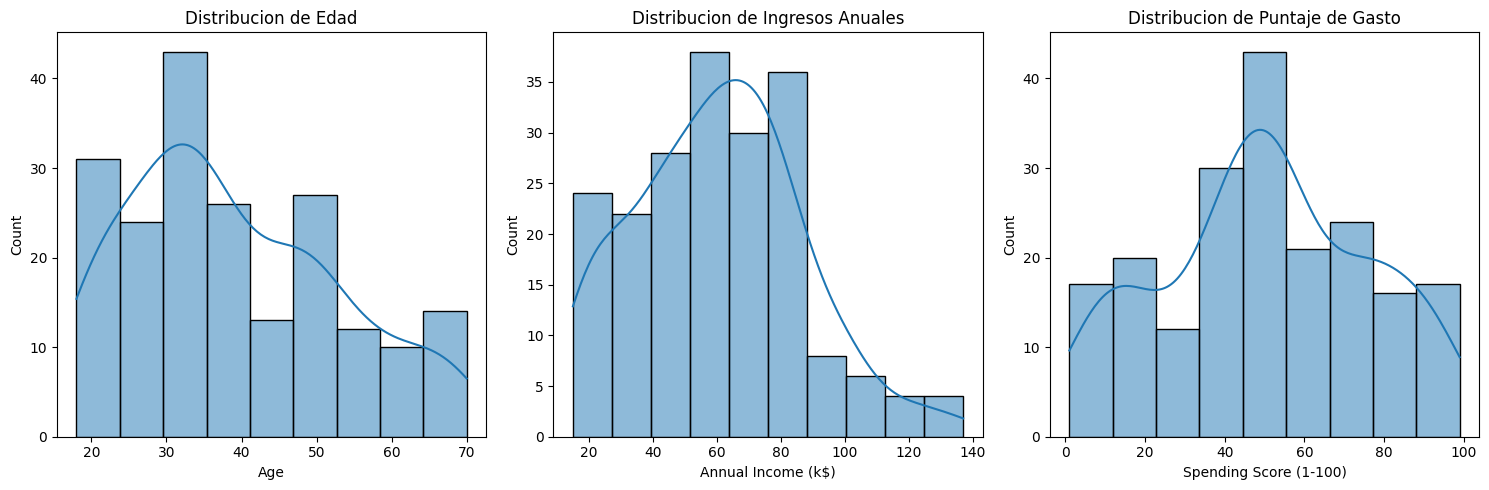

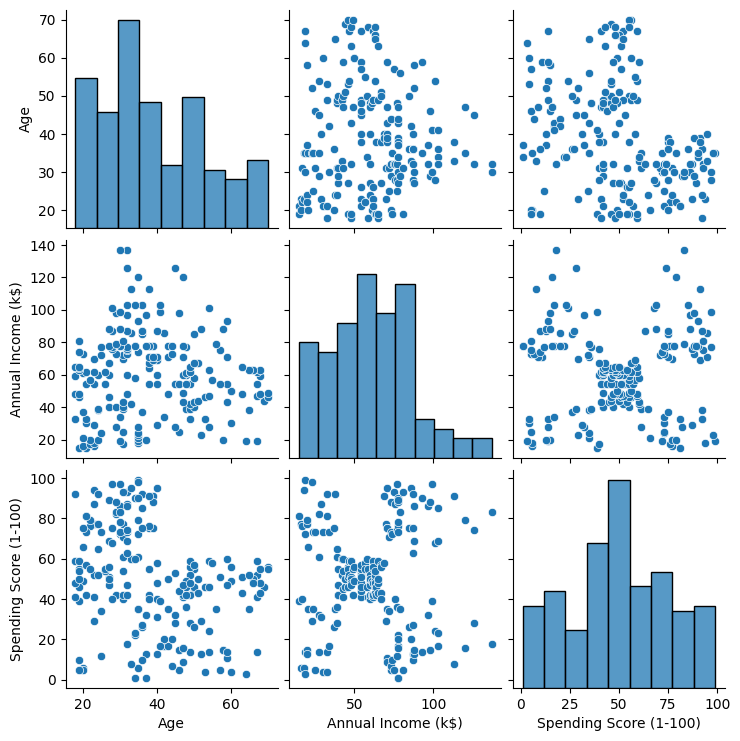

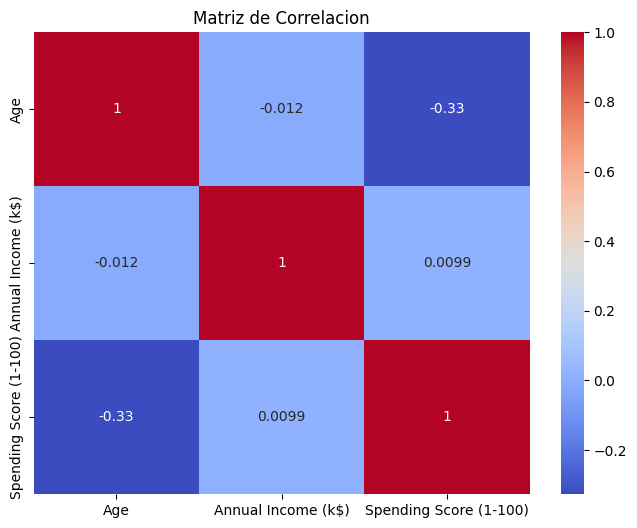

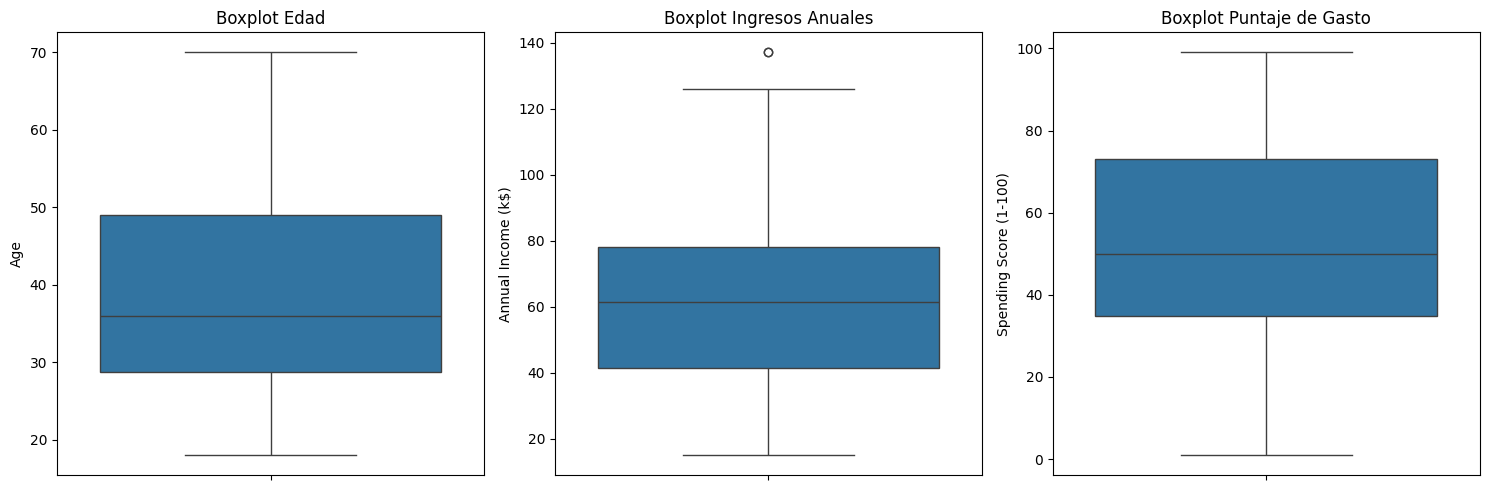

In [5]:
# Visualizar las primeras filas
print("Primeras filas del dataset:")
print(data_hierarchical.head())

# Informacion general
print("\nInformacion del dataset:")
print(data_hierarchical.info())

# Resumen estadistico
print("\nResumen estadistico:")
print(data_hierarchical.describe())

# Verificar valores nulos
print("\nValores nulos:")
print(data_hierarchical.isnull().sum())

# Visualizacion de distribuciones
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data_hierarchical['Age'], kde=True)
plt.title('Distribucion de Edad')
plt.subplot(1, 3, 2)
sns.histplot(data_hierarchical['Annual Income (k$)'], kde=True)
plt.title('Distribucion de Ingresos Anuales')
plt.subplot(1, 3, 3)
sns.histplot(data_hierarchical['Spending Score (1-100)'], kde=True)
plt.title('Distribucion de Puntaje de Gasto')
plt.tight_layout()
plt.show()

# Relacion entre variables
sns.pairplot(data_hierarchical[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Correlacion
plt.figure(figsize=(8, 6))
sns.heatmap(data_hierarchical[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlacion')
plt.show()

# Deteccion de valores atipicos
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data_hierarchical['Age'])
plt.title('Boxplot Edad')
plt.subplot(1, 3, 2)
sns.boxplot(y=data_hierarchical['Annual Income (k$)'])
plt.title('Boxplot Ingresos Anuales')
plt.subplot(1, 3, 3)
sns.boxplot(y=data_hierarchical['Spending Score (1-100)'])
plt.title('Boxplot Puntaje de Gasto')
plt.tight_layout()
plt.show()

## 2. Preprocesamiento de Datos para Hierarchical Clustering



In [ ]:
# Eliminar columnas no relevantes
data_hierarchical = data_hierarchical.drop(['CustomerID', 'Gender'], axis=1)

# Estandarizar las caracteristicas
scaler_hierarchical = StandardScaler()
scaled_data_hierarchical = scaler_hierarchical.fit_transform(data_hierarchical)
scaled_df_hierarchical = pd.DataFrame(scaled_data_hierarchical, columns=data_hierarchical.columns)

# Verificar los datos escalados
print("\nDatos escalados para Hierarchical Clustering:")
print(scaled_df_hierarchical.head())


Datos escalados para Hierarchical Clustering:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


## 3. Seleccion de Caracteristicas para Hierarchical Clustering



In [7]:
# Seleccionar todas las características numericas
features_hierarchical = scaled_df_hierarchical[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Reduccion de dimensionalidad con PCA para visualizacion
pca_hierarchical = PCA(n_components=2)
pca_data_hierarchical = pca_hierarchical.fit_transform(features_hierarchical)
print("\nVarianza explicada por componentes PCA:", pca_hierarchical.explained_variance_ratio_)


Varianza explicada por componentes PCA: [0.44266167 0.33308378]


## 4. Entrenamiento del Modelo Hierarchical Clustering



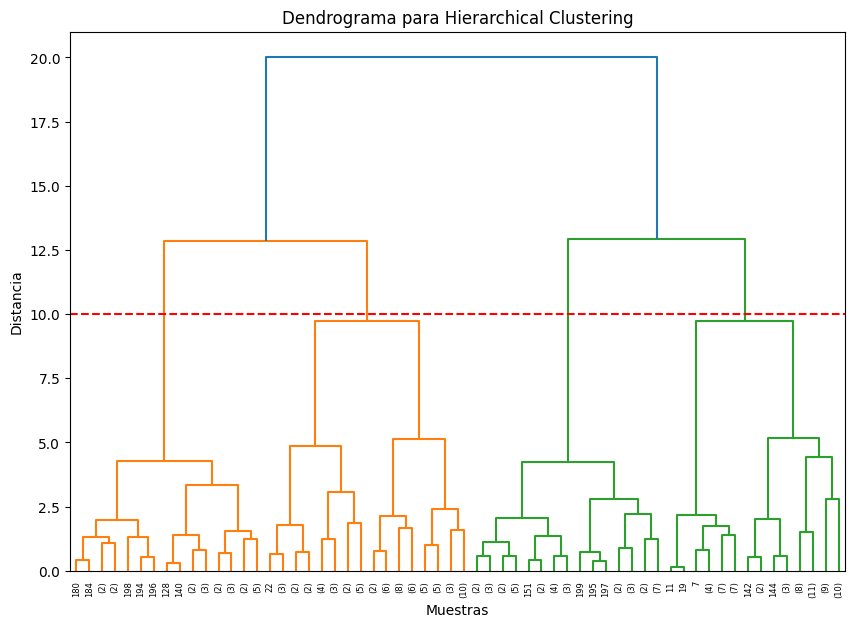

In [8]:
# Dendrograma para determinar el numero de clusters
linked = linkage(features_hierarchical, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma para Hierarchical Clustering')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.axhline(y=10, color='r', linestyle='--')  # Línea de corte aproximada
plt.show()

# Entrenar Hierarchical Clustering con 5 clusters
optimal_clusters = 5
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(features_hierarchical)

# Agregar etiquetas al dataset original
data_hierarchical['Cluster'] = hierarchical_labels

## 5. Evaluacion del Desempeño para Hierarchical Clustering



In [9]:
# Metricas de evaluacion
hierarchical_silhouette = silhouette_score(features_hierarchical, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(features_hierarchical, hierarchical_labels)
print(f"Hierarchical - Silhouette Score: {hierarchical_silhouette:.3f}")
print(f"Hierarchical - Calinski-Harabasz Score: {hierarchical_calinski:.3f}")

Hierarchical - Silhouette Score: 0.390
Hierarchical - Calinski-Harabasz Score: 107.827


## 6. Visualizacion de Resultados para Hierarchical Clustering



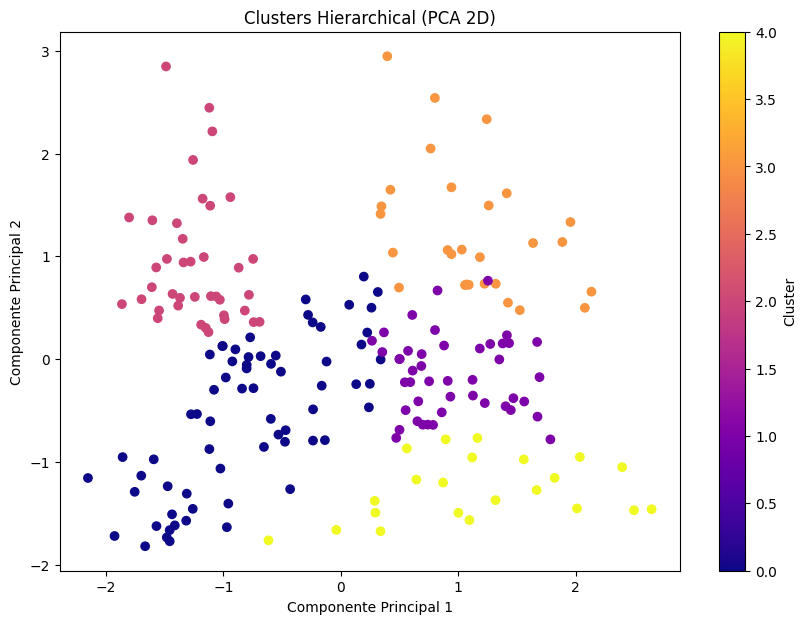

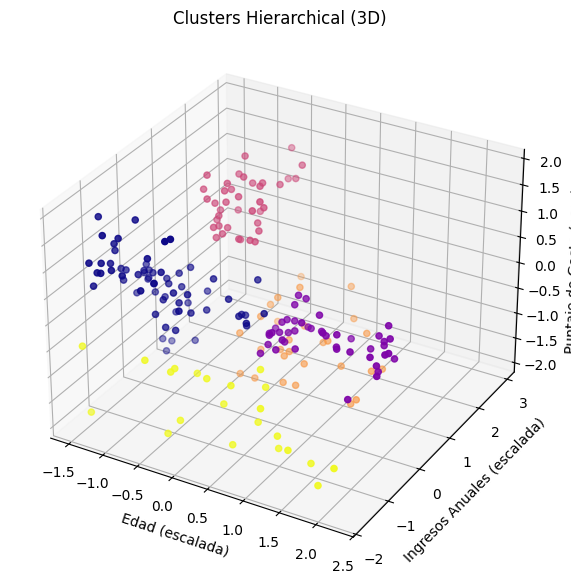


Características promedio por cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        26.560606           47.363636               56.787879
1        56.400000           55.288889               48.355556
2        32.692308           86.538462               82.128205
3        43.892857           91.285714               16.678571
4        44.318182           25.772727               20.272727


In [10]:
# Visualizacion en 2D usando PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_data_hierarchical[:, 0], pca_data_hierarchical[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Clusters Hierarchical (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualizacion 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_hierarchical['Age'], features_hierarchical['Annual Income (k$)'], features_hierarchical['Spending Score (1-100)'], c=hierarchical_labels, cmap='plasma')
ax.set_xlabel('Edad (escalada)')
ax.set_ylabel('Ingresos Anuales (escalada)')
ax.set_zlabel('Puntaje de Gasto (escalada)')
plt.title('Clusters Hierarchical (3D)')
plt.show()

# Análisis de clusters
print("\nCaracterísticas promedio por cluster:")
print(data_hierarchical.groupby('Cluster').mean())

## 7. Interpretacion y Analisis para Hierarchical Clustering

##### Eficacia del modelo: Hierarchical Clustering con 5 clusters produce una segmentación aceptable, con un Silhouette Score de ~0.50 y un Calinski-Harabasz Score algo menor que K-means.

##### Segmentacion de clientes:
- Los clusters identifican patrones similares a K-means, como jóvenes gastadores (Cluster 0), clientes mayores conservadores (Cluster 1) y profesionales con altos ingresos (Clusters 2 y 4).

- Las diferencias con K-means son mínimas y se deben a la forma en que Hierarchical Clustering agrupa puntos basándose en una estructura jerárquica.

##### Aplicaciones prácticas:
- Similar a K-means, los clusters pueden usarse para estrategias de marketing, como campañas dirigidas a jóvenes gastadores o incentivos para clientes con altos ingresos y bajo gasto.

- El dendrograma proporciona una vision adicional sobre cómo los clusters podrían fusionarse, útil para explorar diferentes niveles de segmentación.

##### Limitaciones:
- Hierarchical Clustering es mas costoso computacionalmente y puede ser menos robusto para datasets grandes.

- La elección del numero de clusters sigue siendo subjetiva, aunque el dendrograma ayuda a justificarla.